<a href="https://colab.research.google.com/github/JeremiahKamama/Spacy-Analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import string



from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokenizer import Tokenizer


from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

#LinearSVC,Logistic Regression,RandomForest,DecisionTree,KNeighborsClassifier



In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
imdb = pd.read_csv('/content/drive/MyDrive/data/IMDB.csv')

imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
imdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
imdb.sentiment.replace("positive", 1 , inplace= True)
imdb.sentiment.replace("negative", 0, inplace= True)
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


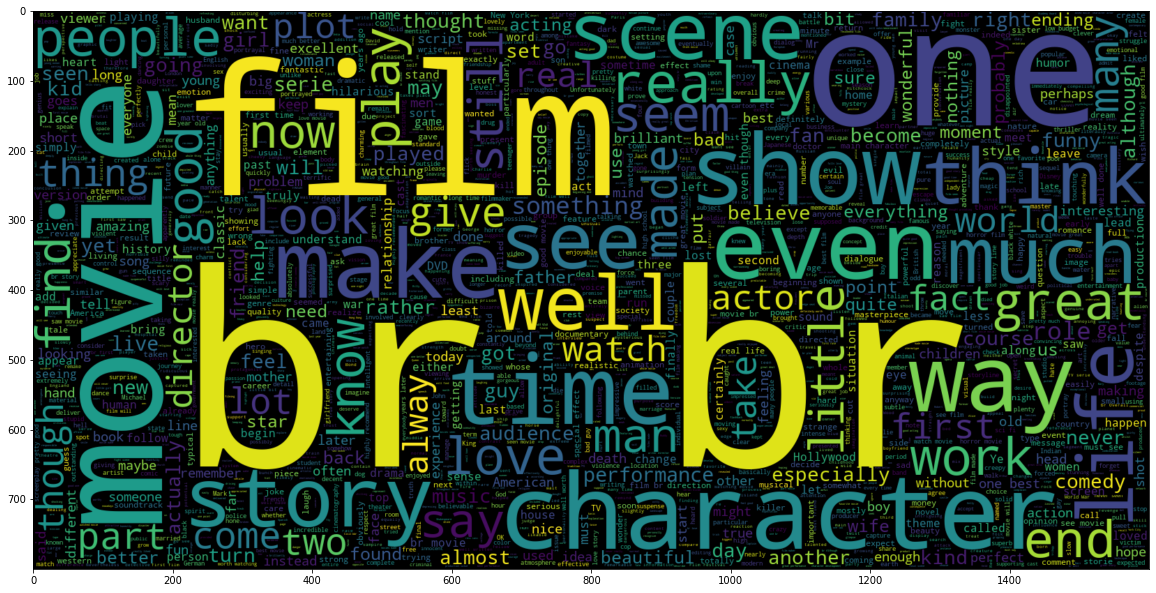

In [7]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 1].review))
plt.imshow(cloud, interpolation='bilinear')

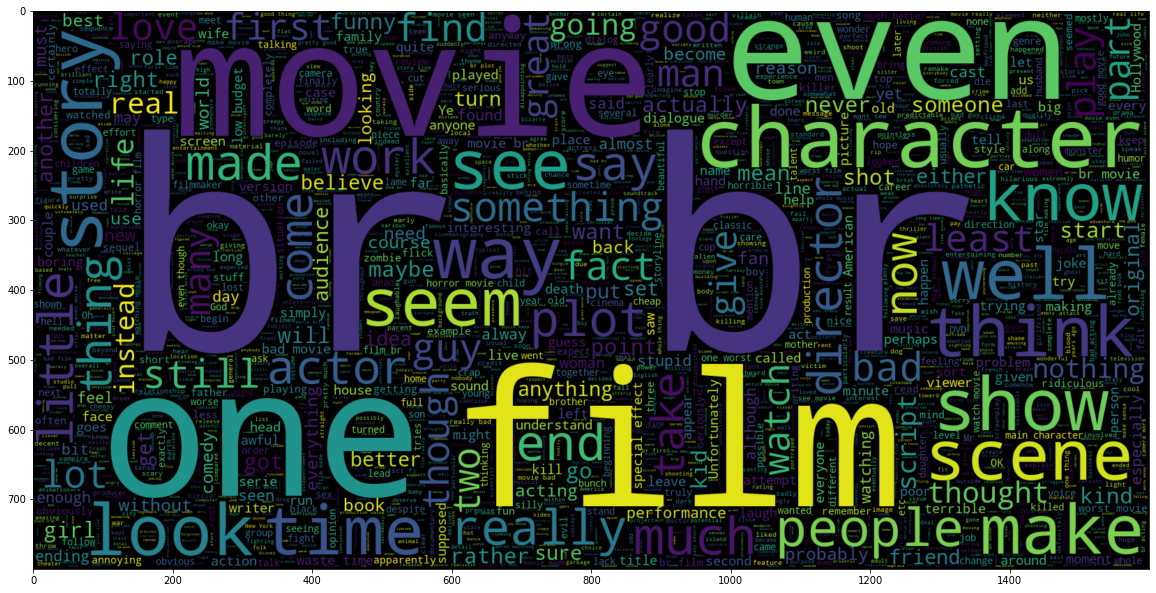

In [8]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 0].review))
plt.imshow(cloud, interpolation='bilinear')

In [9]:
#checking missing data
miss_val = imdb.isnull().sum()

miss_val[0:10]

review       0
sentiment    0
dtype: int64

In [10]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)


In [11]:
def clean_data(sentence):
  doc = nlp(sentence)
  tokens = []
  for token in doc:
    if token.lemma_ != '-PRON-':
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
  clean_tokens = []
  for token in tokens:
    if token not in punct and token not in stopwords:
      clean_tokens.append(token)
  return clean_tokens


In [12]:
X = imdb['review']
y = imdb['sentiment']

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [13]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import xgboost as xgb

#learning_rate=0.1, max_depth=7,n_estimators=80,use_label_encoder=False,eval_metric='auc'
tfidf = TfidfVectorizer(tokenizer = clean_data)


steps = [('tfidf',tfidf), ('classifier', xgb.XGBClassifier(random_state=1,learning_rate=0.1))]

pipe = Pipeline(steps)


 

In [17]:
from sklearn.metrics import confusion_matrix

#print(confusion_matrix(y_test,y_pred))

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([('bow',CountVectorizer()),('tfid',TfidfTransformer()),('model', MultinomialNB())])


In [19]:

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(accuracy_score(y_test,y_pred))



0.8635


In [60]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
!pip install transformers
!pip install torchvision

In [55]:
import transformers
from transformers import DistilBertForSequenceClassification,DistilBertTokenizer

import torch
import torch.nn as nn
from torch.utils.data import Dataset, dataloader


In [56]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased", truncation= True)

In [46]:
model = DistilBert()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [57]:
def prediction(model, sentence: str, max_len: int = 512, device = 'cpu'):
    x_encoded = tokenizer.encode_plus(sentence, add_special_tokens=True, pad_to_max_length=True, max_length=max_len, return_tensors="pt",).to(device)
    logits = model(x_encoded['input_ids'], x_encoded['attention_mask'])
    probabilities = F.softmax(logits.detach(), dim=1)
    output = probabilities.max(axis=1)
    print(sentence)
    print(f"Sentiment: {['Negative' if output.indices[0] == 0 else 'Positive'][0]}") 
    #Probability: {output.values[0]:.4f}")


In [58]:
prediction(model, df_test['review'].values[11])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


I went to this film having no idea what to expect. I actually took a date to it in the theaters when it first came out. We both thoroughly enjoyed it and it helped to have someone to discuss it with after seeing it.<br /><br />I only recommend seeing this film if you appreciate non-mainstream movies. It's not as disjointed as Liquid Sky or as fanciful as Forbidden Zone. The original plot is very easy to follow. There's A LOT of subtle humor.<br /><br />Here's a quick summary of the plot if you are completely lost: A big-brother type government keeps tabs on everyone in society. Suddenly a new person appears and there's no data on him (he appears insane). He may or may not be the second-coming of Christ. The over-cautious government goes into a frenzy to find him and discover his true motives. The ruler is also obsessed with immortality.<br /><br />Some scenes are frantic while others are completely low-key. We follow the lead character as he encounters all different kinds of people in 

In [ ]:
from transformers import pipeline

classifier_sentiment = pipeline("sentiment-analysis")

In [54]:
classifier_sentiment(df_test['review'].values[20])

[{'label': 'POSITIVE', 'score': 0.9994577169418335}]